In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [2]:
def wavelet_function(input_series, filter_length=2, 
                     scaling_filter_coefficients=[1/(np.power(2, 1/2)), 1/(np.power(2, 1/2))],
                    wavelet_filter_coefficients=[-1/(np.power(2, 1/2)), 1/(np.power(2, 1/2))]):
    series_length = input_series.shape[0]
    
    w_series = np.zeros(int(series_length/2), float)
    v_series = np.zeros(int(series_length/2), float)
    for t in range(int(series_length/2)):
        lw_sum = 0
        lv_sum = 0
        for l in range(filter_length):
            lw_sum+= wavelet_filter_coefficients[l]*input_series[(2*t + 1 - l)%series_length]
            lv_sum+= scaling_filter_coefficients[l]*input_series[(2*t + 1 - l)%series_length]
        
        w_series[t] = lw_sum
        v_series[t] = lv_sum
    #w_series[int(series_length/2)] = 0
    
    w_series = w_series[~np.isnan(w_series)] 
    v_series = v_series[~np.isnan(v_series)] 
    return w_series, v_series

In [3]:
bitcoin = pd.read_csv("hf_bitcoin.csv")
bitcoin = bitcoin.dropna()
bitcoin.Timestamp = bitcoin.Timestamp.astype(pd.Timestamp)

In [4]:
bitcoin['date'] = pd.to_datetime(bitcoin.Timestamp,unit='s')

In [17]:
resampled_series = bitcoin.set_index("date").Close.resample("1min").mean().interpolate()

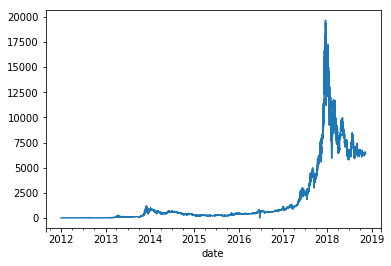

In [18]:
resampled_series.plot()

In [19]:
log_returns = np.log(resampled_series/resampled_series.shift())
abs_log_returns = np.abs(log_returns)
abs_log_returns = abs_log_returns.dropna()
series_length = abs_log_returns.shape[0]

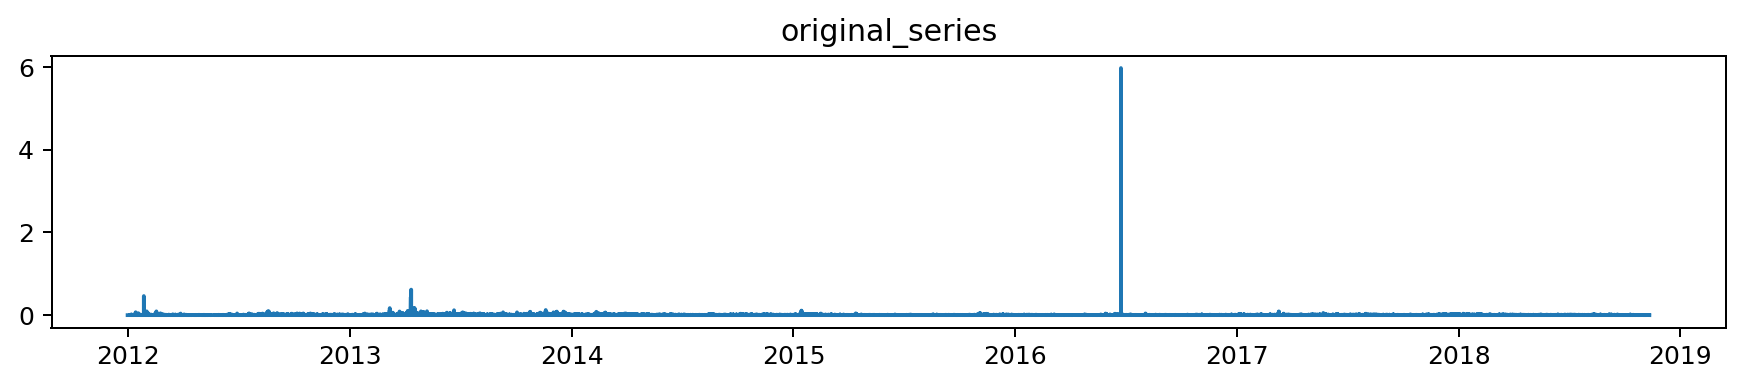

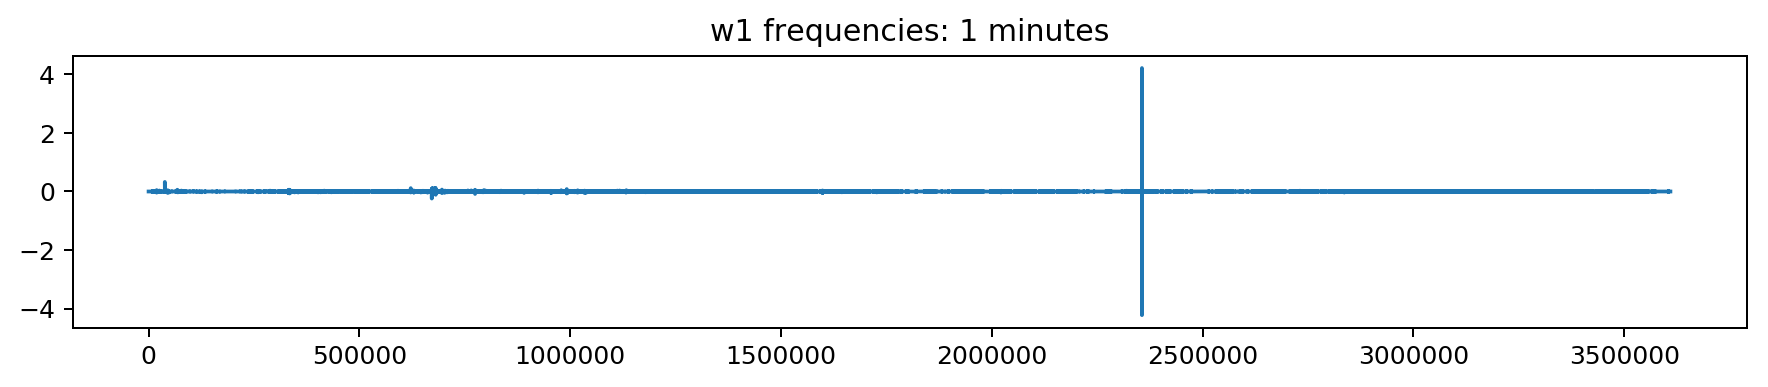

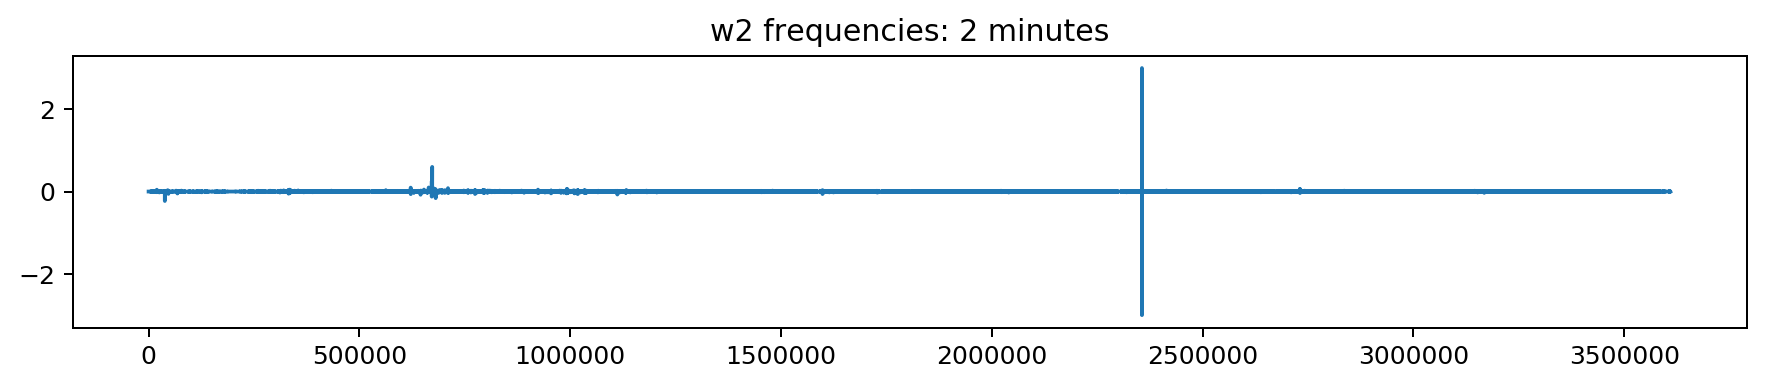

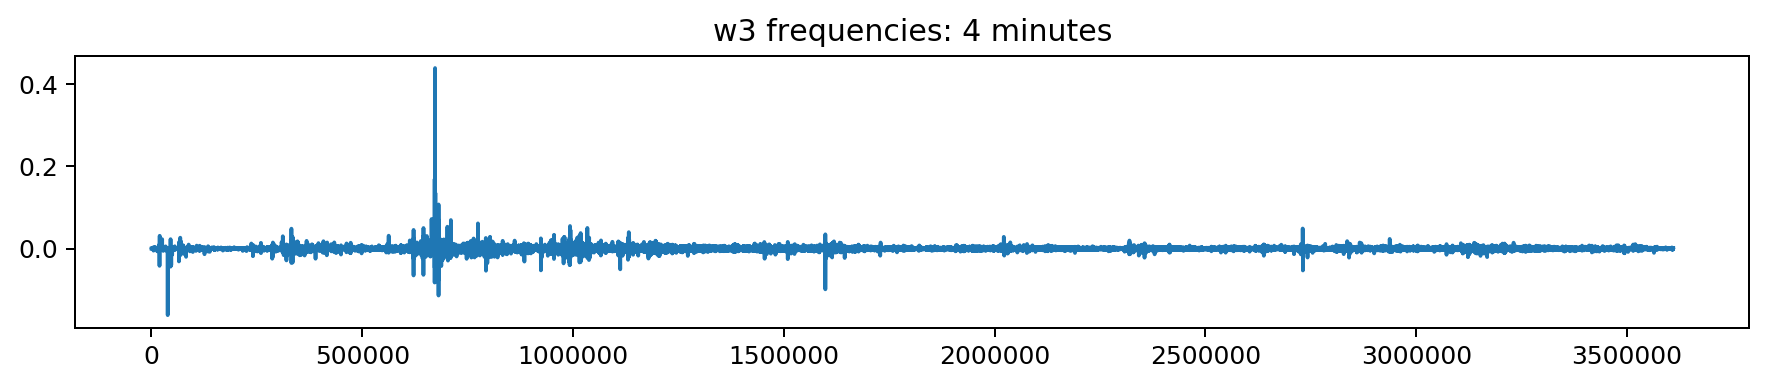

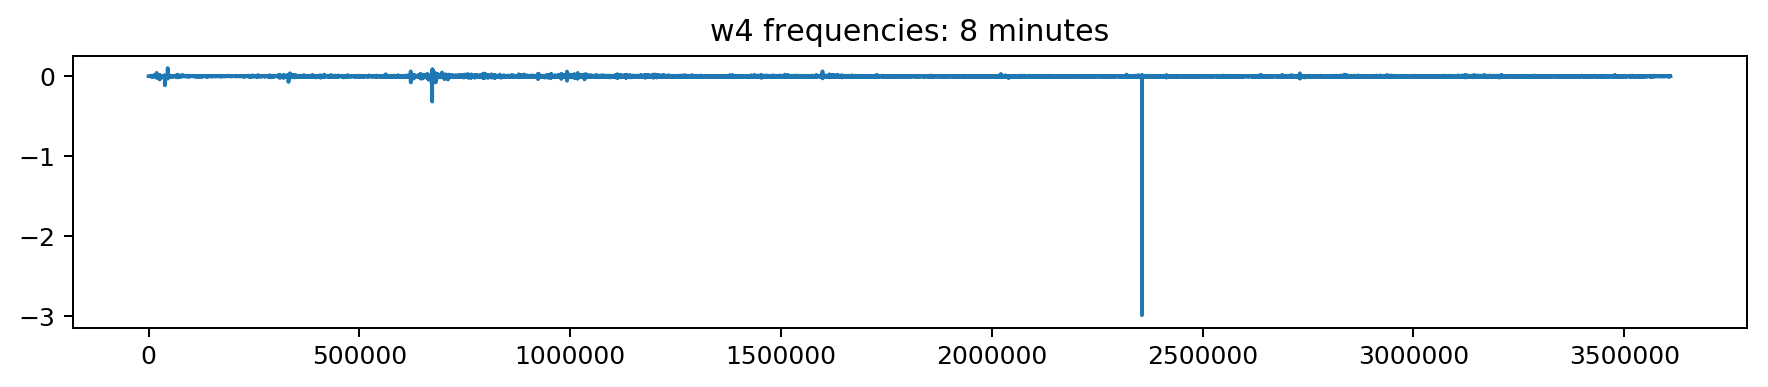

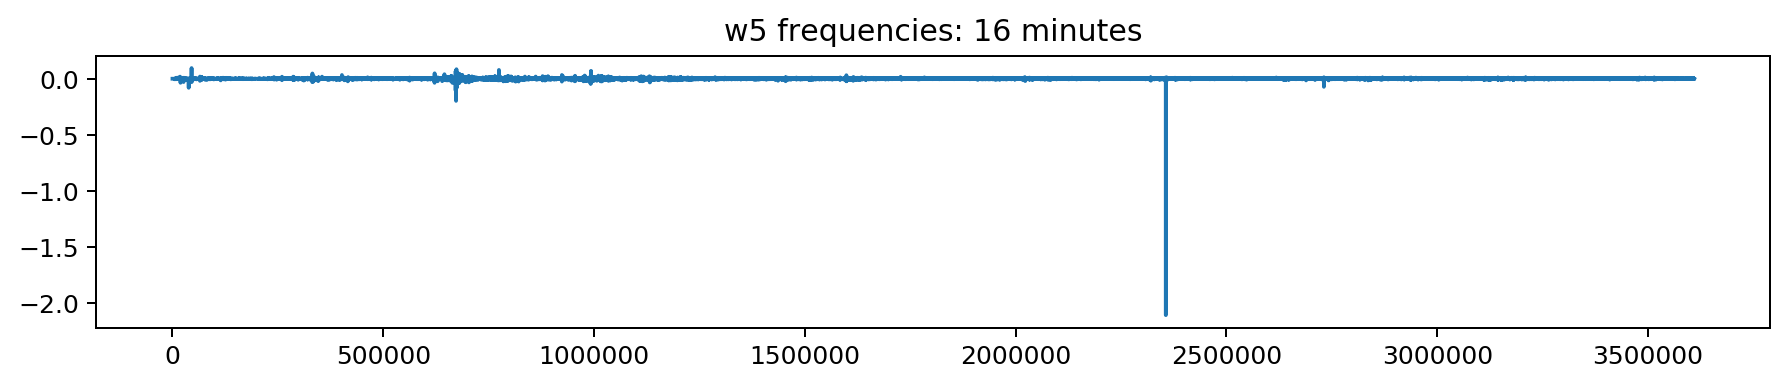

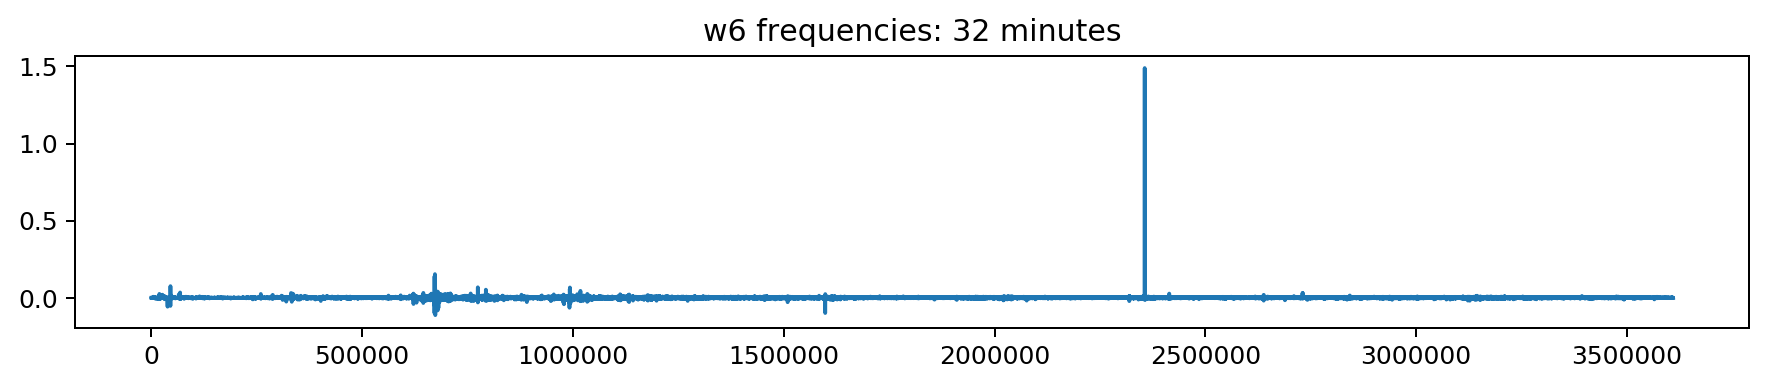

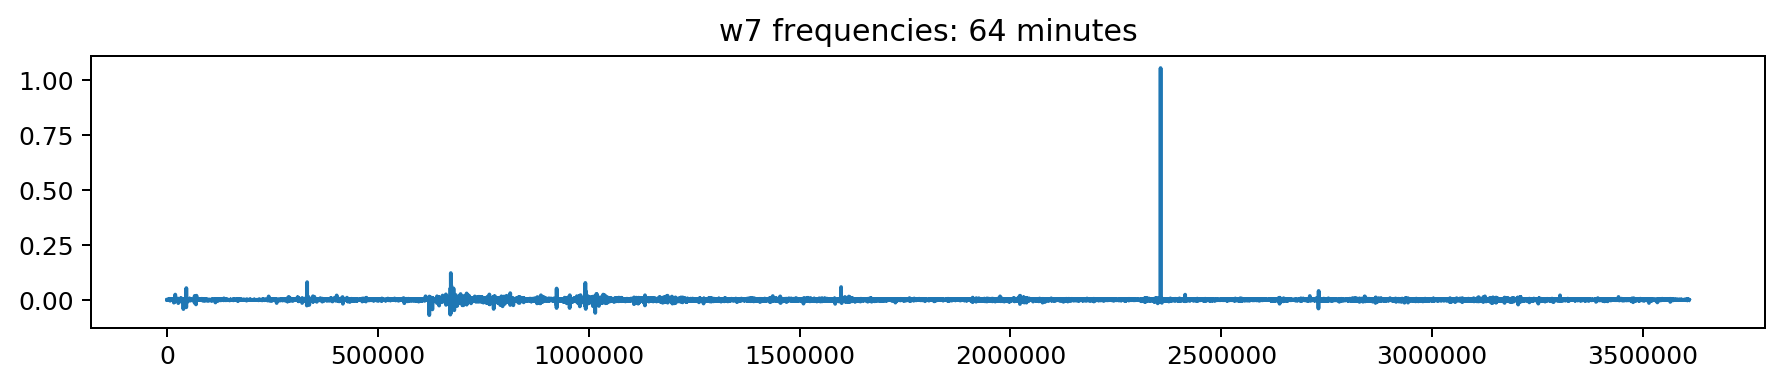

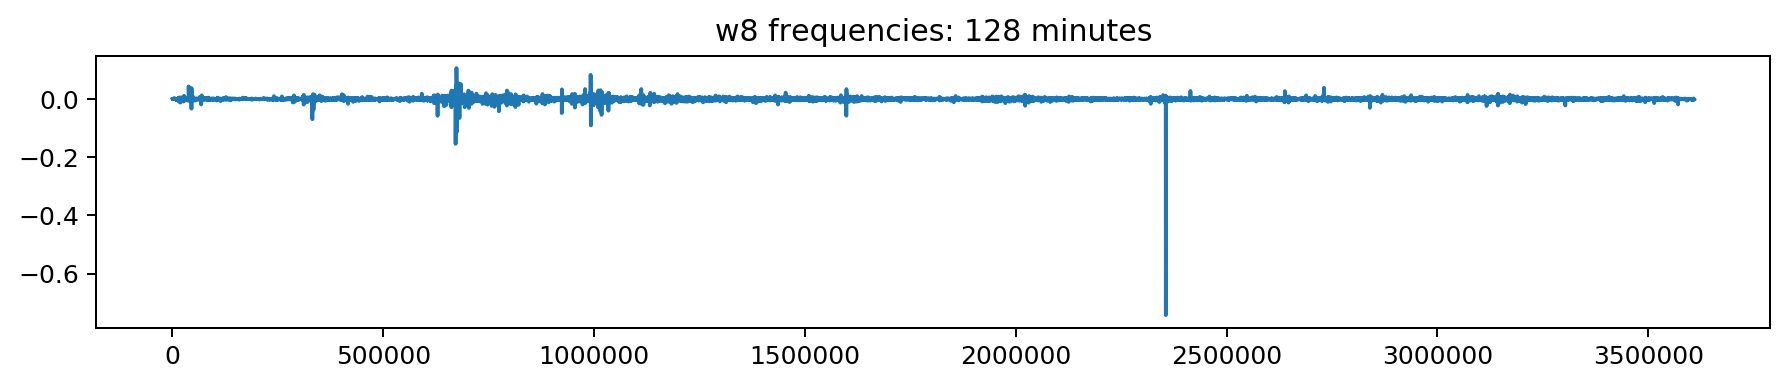

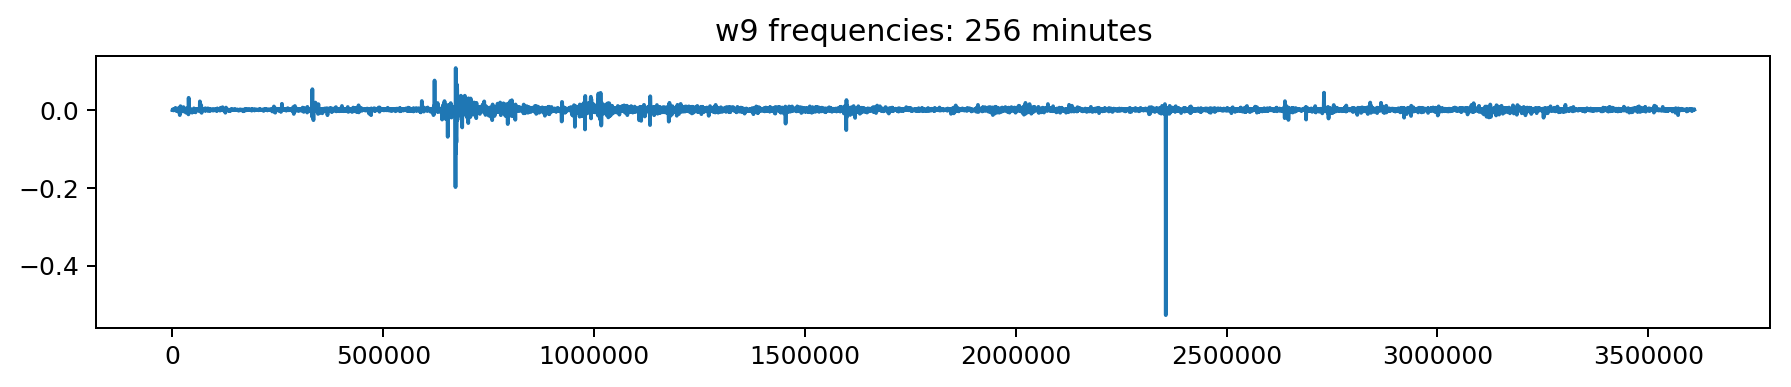

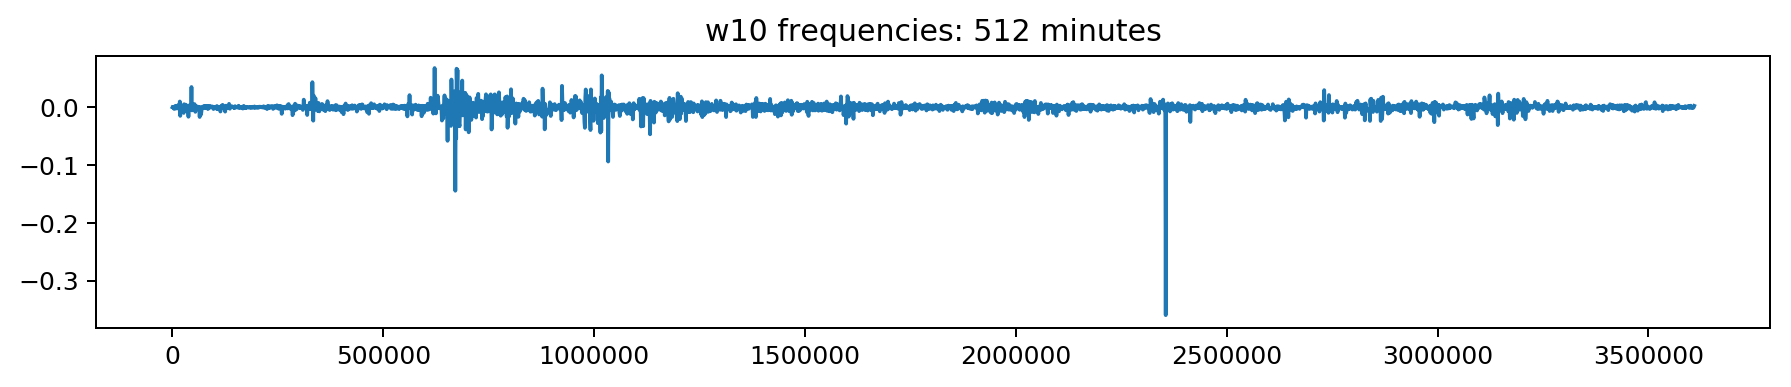

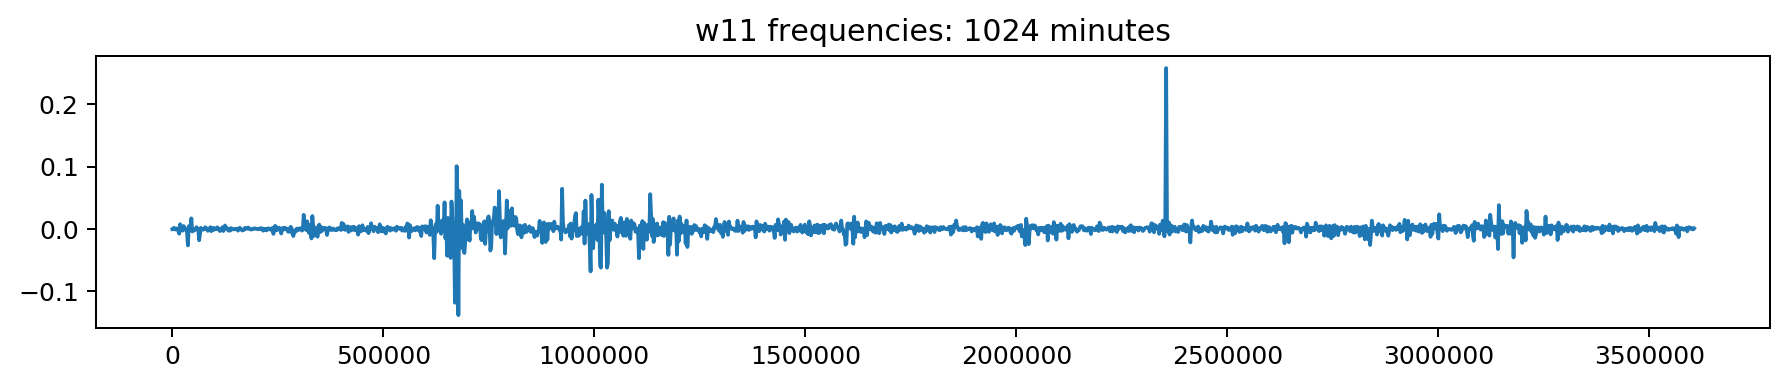

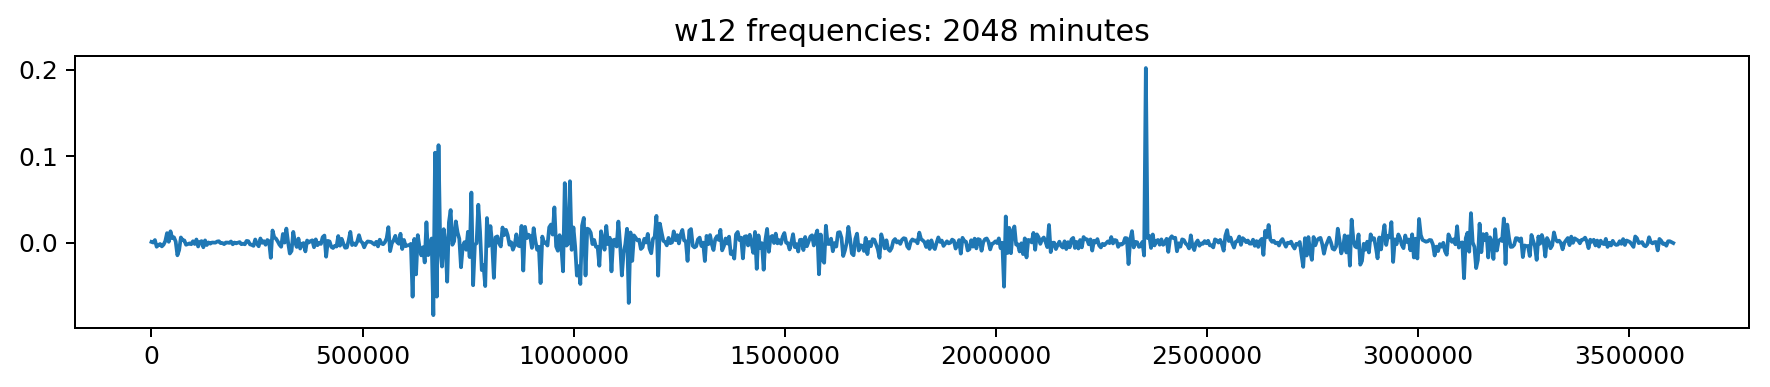

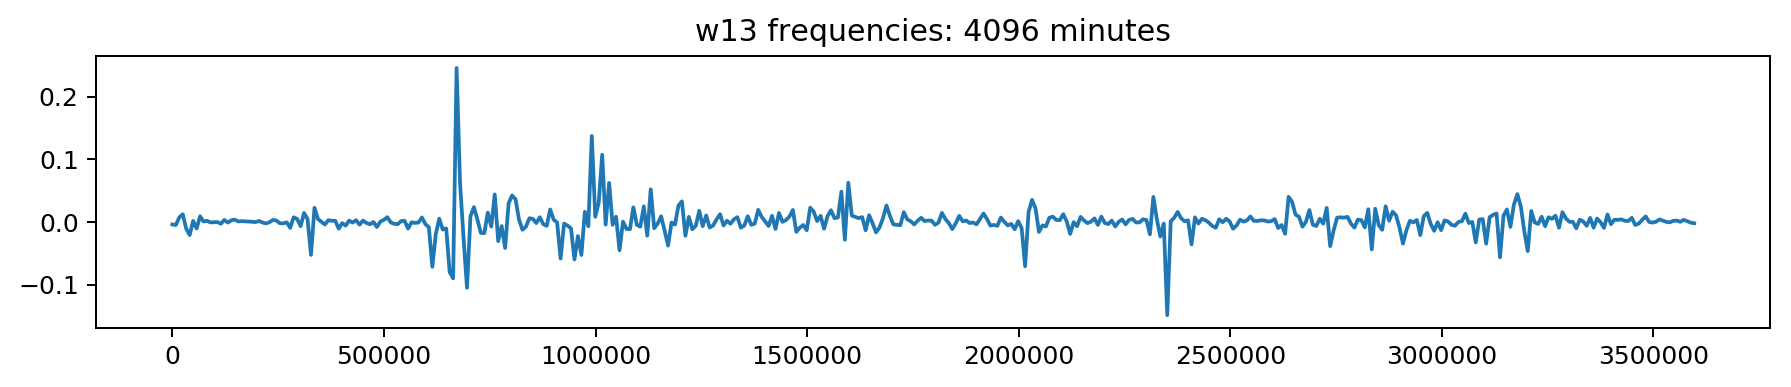

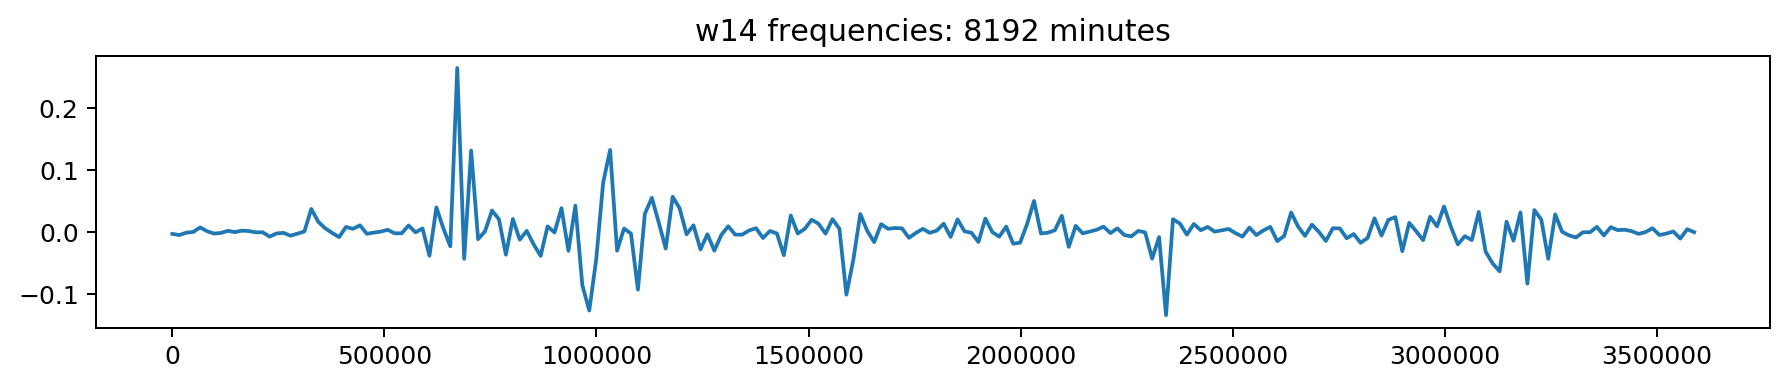

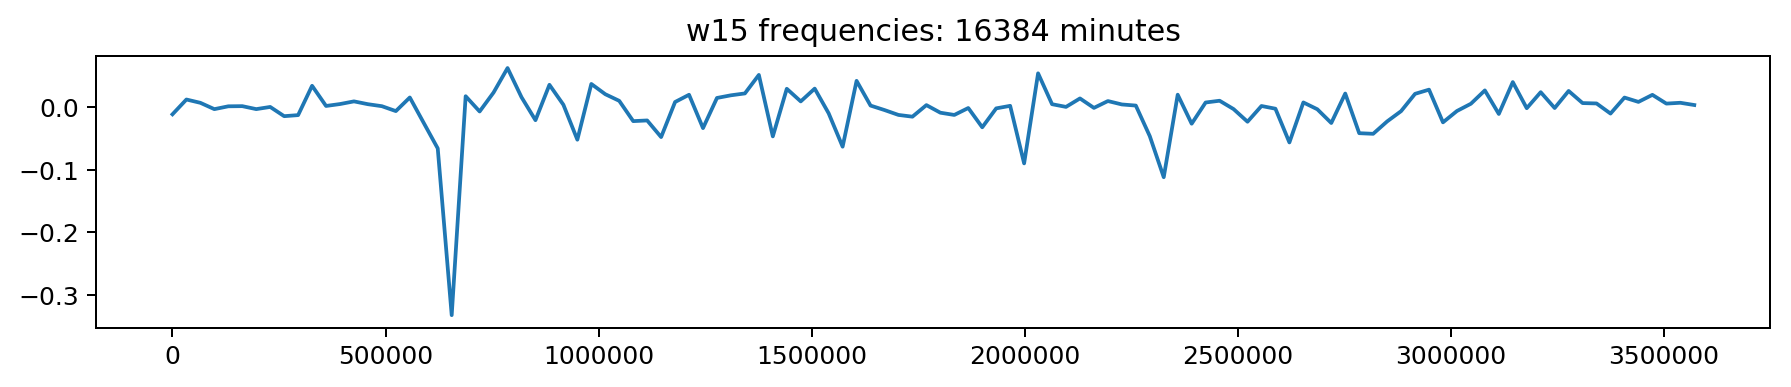

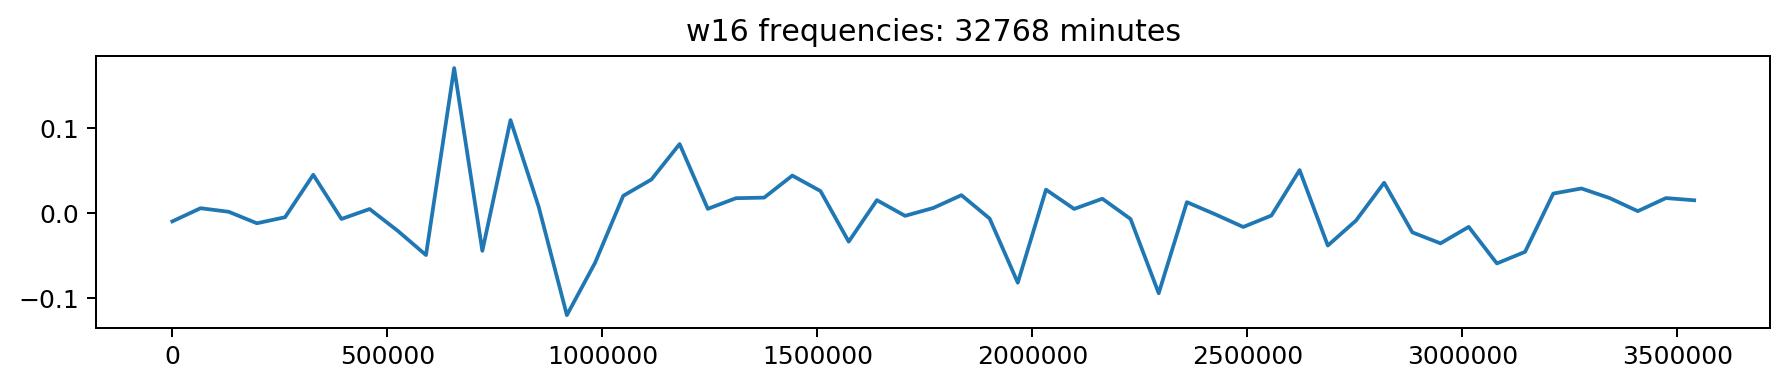

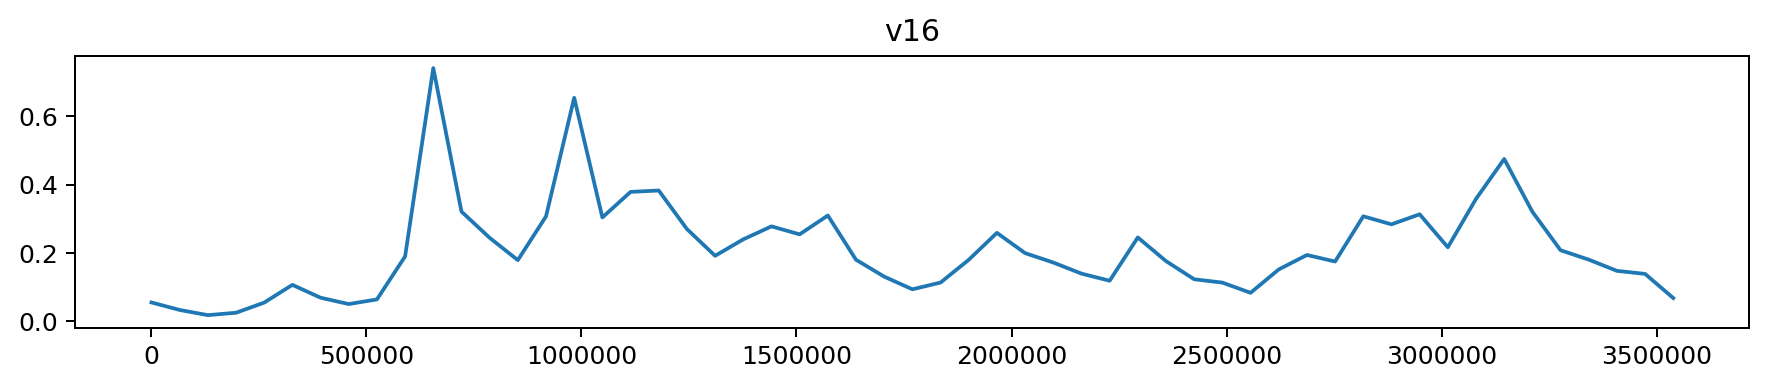

In [26]:
sampling_frequency = 1 #minute 
decompositions = 16
hor_len = 12
vert_len = 2
v_n = abs_log_returns.values
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot(abs_log_returns)
plt.title("original_series")
plt.show()
for i in range(decompositions):
    w, v = wavelet_function(v_n)
    v_n = v
    figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
    plt.plot([x*(2**(i+1)) for x in range(int(series_length/(2**(i+1))))], w)
    plt.title("w"+str(i+1) + " frequencies: "+ str(sampling_frequency*(2**i))+ " minutes")
    plt.show()
    
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot([x*(2**(i+1)) for x in range(int(series_length/(2**(i+1))))], v)
plt.title("v"+str(i+1))
plt.show()


    